In [156]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [202]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=420):
    centers_history = []
    labels_history = []
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    centers_history.append(centers)
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        labels_history.append(labels)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        centers_history.append(new_centers)
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels, centers_history, labels_history

In [227]:
X, y = make_blobs(n_samples=1500, centers=3, n_features=2, random_state=141)

In [228]:
centers, labels, centers_hist, labels_hist = find_clusters(X, 3)

In [229]:
history = zip(centers_hist, labels_hist)

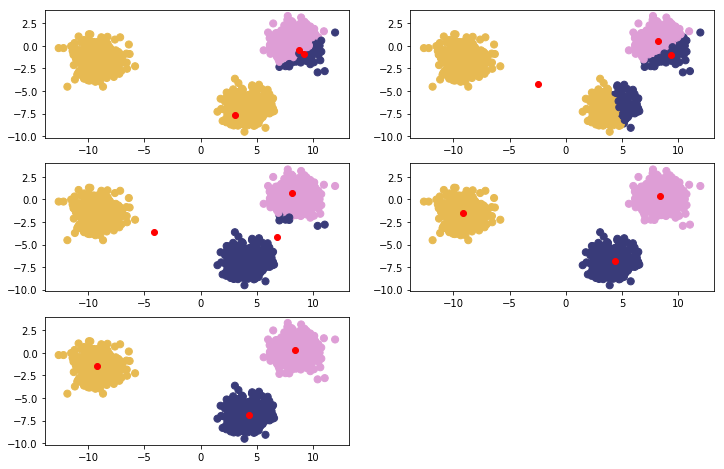

In [255]:
n = 321
for x, y in history:
    plt.figure(1, figsize=(12,8))
    if n == 326:
        plt.show()
    else:
        plt.subplot(n)
        plt.scatter(X[:, 0], X[:, 1], c=y,
                s=50, cmap='tab20b');
        plt.scatter(x[:, 0], x[:, 1], c='red')
        n +=1

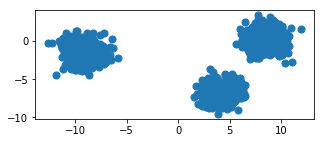

In [259]:
plt.figure(1, figsize=(5,2))
plt.scatter(X[:, 0], X[:, 1],
                s=50)

Text(0.5,1,'2d Space')

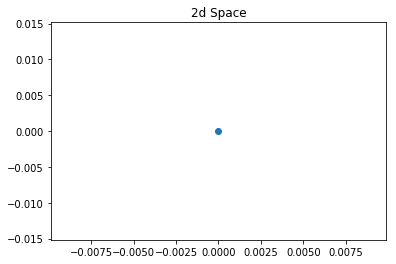

In [316]:
plt.scatter(0,0)
plt.title("2d Space")

In [150]:
km = KMeans(2).fit(X)

In [151]:
km.cluster_centers_

array([[-4.77860379,  0.63610352],
       [-6.92882226,  4.77650948]])

In [152]:
y = km.predict(X)

In [267]:
X[1]

array([ 5.76782236, -6.60424756])

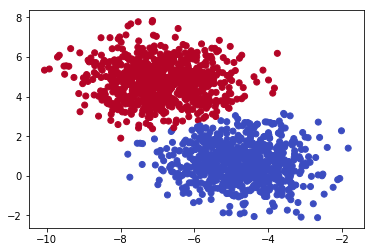

In [154]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
#plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1])

## K-Means from Scratch

In [301]:
import math
import numpy as np

In [300]:
X

array([[ 8.42986518,  0.54630782],
       [ 5.76782236, -6.60424756],
       [-9.55381287, -0.1301427 ],
       ...,
       [ 2.57214809, -6.50354191],
       [-8.037997  , -2.49199474],
       [ 8.20473323,  0.79568964]])

In [302]:
# Euclidean distance formula, where a and b are each 2 item lists
def e_dist(a,b):
    return math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

In [ ]:
def k_means(X, k):
    random_centroids = [zip(np.random.randint(0, np.max(X), size=k), np.random.randint(0, np.max(X), size=k))]
    clusters =
    for centroid in random_centroids:
        for point in range(len(X)):
            distances = e_dist(X[point], centroid)
            cluster = np.argmin(distances)
            clusters[i] = cluster

# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(k)
# Error function 
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)



Text(0.5,0.92,'3d Space')

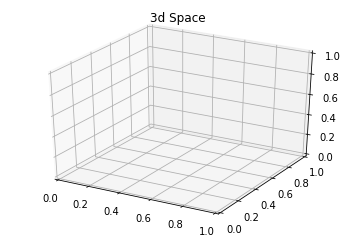

In [313]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title("3d Space")

In [308]:
Axes3D.scatter(X, X, zs=0, zdir='z', s=20, c=None, depthshade=True)

TypeError: unbound method scatter() must be called with Axes3D instance as first argument (got ndarray instance instead)

In [ ]:
[ 8.42986518,  0.54630782],
       [ 5.76782236, -6.60424756],
       [-9.55381287, -0.1301427 ],
       ...,
       [ 2.57214809, -6.50354191],
       [-8.037997  , -2.49199474],
       [ 8.20473323,  0.79568964]